# Proyek Analisis Data: Kualitas Udara di Changping dan Dingling
- **Nama:** Friskha Amellia Eddy
- **Email:** m182b4kx1560@bangkit.academy
- **ID Dicoding:** friskhaamelliaeddy

## Menentukan Pertanyaan Bisnis

- Bagaimana pola perubahan tingkat PM2.5 dari waktu ke waktu di dua lokasi tersebut?
- Bagaimana ubungan antara kondisi cuaca dengan tingkat polusi PM2.5?
- Bagaimana perbandingan tingkat polusi PM2.5 di Changping dan Dingling pada musim yang berbeda?

## Import Semua Packages/Library yang Digunakan

In [71]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [72]:
data1 = 'data\Changping.csv'
data2 = 'data\Dingling.csv'

In [73]:
data_changping = pd.read_csv(data1)
data_dingling = pd.read_csv(data2)

**Insight:**
Pengumpulan data merupakan kunci penting dalam analisis sebuah data. Dalam isi data yang dipakai, data memberikan informasi suatu kualitas udara yang akan mempengaruhi langkah analisis data. Kualitas dan relevansi data yang dikumpulkan berpengaruh pada wawasan yang diperoleh dan pengambilan keputusan.

### Assessing Data

In [74]:
print(data_changping.info())
print(data_dingling.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries

In [75]:
print(data_changping.head())
print(data_dingling.head())

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  13.0   7.0  300.0  85.0  -2.3   
1   2  2013      3    1     1    3.0   3.0   6.0   6.0  300.0  85.0  -2.5   
2   3  2013      3    1     2    3.0   3.0  22.0  13.0  400.0  74.0  -3.0   
3   4  2013      3    1     3    3.0   6.0  12.0   8.0  300.0  81.0  -3.6   
4   5  2013      3    1     4    3.0   3.0  14.0   8.0  300.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM    station  
0  1020.8 -19.7   0.0    E   0.5  Changping  
1  1021.3 -19.0   0.0  ENE   0.7  Changping  
2  1021.3 -19.9   0.0  ENE   0.2  Changping  
3  1021.8 -19.1   0.0  NNE   1.0  Changping  
4  1022.3 -19.4   0.0    N   2.1  Changping  
   No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  3.0  NaN  200.0  82.0  -2.3   
1   2  2013      3    1     1    7.0   7.0  3.0  NaN  200.0  80.0  -2.5   
2   3  2013      3    1     2    5.0

**Insight:**
Dengan melihat informasi dari dataset, kita dapat memahami ukuran, tipe data,
dan apakah terdapat nilai yang hilang.

Merge Data

In [76]:
import pandas as pd

data_changping = pd.read_csv('data/Changping.csv')
data_dingling = pd.read_csv('data/Dingling.csv')

data_changping['station'] = 'Changping'
data_dingling['station'] = 'Dingling'

main_data = pd.concat([data_changping, data_dingling], ignore_index=True)
main_data.to_csv('dashboard/main_data.csv', index=False)

print("Data digabungkan dan disimpan sebagai main_data.csv")


Data digabungkan dan disimpan sebagai main_data.csv


### Cleaning Data

In [77]:
data_clean = main_data.dropna(subset=['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3'], how='all')

In [78]:
air_quality_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
for col in air_quality_cols:
    data_clean[col] = data_clean.groupby('station')[col].transform(lambda x: x.fillna(x.mean()))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7632\534028114.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[col] = data_clean.groupby('station')[col].transform(lambda x: x.fillna(x.mean()))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7632\534028114.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[col] = data_clean.groupby('station')[col].transform(lambda x: x.fillna(x.mean()))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7632\534028114.py:3: SettingWithCopyWarning: 
A value is trying

In [79]:
data_clean = data_clean.dropna(subset=['year', 'month', 'day', 'hour'])

In [80]:
data_clean['date'] = pd.to_datetime(data_clean[['year', 'month', 'day', 'hour']], errors='coerce')

In [81]:
print("NaN values in 'date' column:", data_clean['date'].isna().sum())

NaN values in 'date' column: 0


In [82]:
data_clean.dropna(subset=['date'], inplace=True)

**Insight:**
Cleaning data digunakan untuk memastikan analisis data yang akurat dengan menghilangkan data yang tidak valid.

## Exploratory Data Analysis (EDA)

### Explore

In [83]:
print(data_clean[air_quality_cols].describe())

              PM2.5          PM10           SO2           NO2            CO  \
count  69213.000000  69213.000000  69213.000000  69213.000000  69213.000000   
mean      68.548496     89.207079     13.356712     35.896365   1028.786373   
std       72.008164     81.509126     18.464664     29.020127    997.302802   
min        2.000000      2.000000      0.285600      1.026500    100.000000   
25%       16.000000     30.000000      2.000000     14.000000    400.000000   
50%       44.000000     67.000000      6.000000     27.585467    700.000000   
75%       96.000000    124.000000     16.000000     50.000000   1200.000000   
max      882.000000    999.000000    310.000000    226.000000  10000.000000   

                 O3  
count  69213.000000  
mean      63.236140  
std       53.950996  
min        0.214200  
25%       23.000000  
50%       55.000000  
75%       85.000000  
max      500.000000  


In [84]:
monthly_avg_pm25 = data_clean.groupby([data_clean['date'].dt.to_period('M'), 'station'])['PM2.5'].mean().reset_index()
monthly_avg_pm25['date'] = monthly_avg_pm25['date'].dt.to_timestamp()

**Insight:**
Statistik deskriptif memberikan informasi yang sangat berguna tentang sebaran data, seperti rata-rata, median, dan deviasi standar. Statistik deskriptif menunjukkan seberapa parah kualitas udara dan memberi petunjuk awal tentang polusi.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola perubahan tingkat PM2.5 dari waktu ke waktu di dua lokasi tersebut?

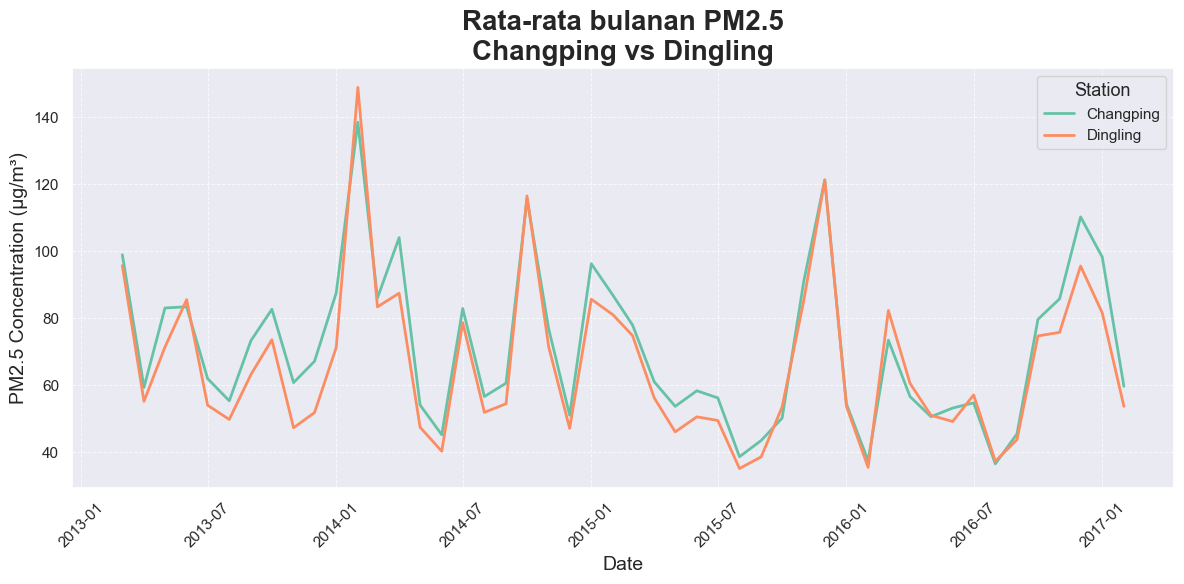

In [85]:
plt.figure(figsize=(12, 6))
sns.set(style="darkgrid")
sns.lineplot(x='date', y='PM2.5', hue='station', data=monthly_avg_pm25,
             markers=['o', 's'], dashes=False, palette='Set2', lw=2, markersize=8)

plt.title('Rata-rata bulanan PM2.5\nChangping vs Dingling', fontsize=20, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('PM2.5 Concentration (µg/m³)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend(title='Station', title_fontsize='13', fontsize='11')
plt.tight_layout()
plt.show()

In [86]:
print(monthly_avg_pm25.head())
print(monthly_avg_pm25.info())

        date    station      PM2.5
0 2013-03-01  Changping  98.916667
1 2013-03-01   Dingling  95.705645
2 2013-04-01  Changping  59.364166
3 2013-04-01   Dingling  55.206506
4 2013-05-01  Changping  83.039247
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     96 non-null     datetime64[ns]
 1   station  96 non-null     object        
 2   PM2.5    96 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.4+ KB
None


Insight:
Analisis tren PM2.5 sepanjang waktu menunjukkan bagaimana tingkat polusi
berubah. Jika ada perubahan signifikan, bisa terhubung dengan faktor musim atau kejadian tertentu seperti kebakaran.

### Pertanyaan 2: Bagaimana ubungan antara kondisi cuaca dengan tingkat polusi PM2.5?

In [87]:
weather_cols = ['TEMP', 'PRES', 'DEWP', 'WSPM']
correlation_matrix = data_clean[['PM2.5'] + weather_cols].corr()
print(correlation_matrix)

          PM2.5      TEMP      PRES      DEWP      WSPM
PM2.5  1.000000 -0.099314 -0.000397  0.125715 -0.262967
TEMP  -0.099314  1.000000 -0.838004  0.823875 -0.003381
PRES  -0.000397 -0.838004  1.000000 -0.765770  0.087980
DEWP   0.125715  0.823875 -0.765770  1.000000 -0.314398
WSPM  -0.262967 -0.003381  0.087980 -0.314398  1.000000


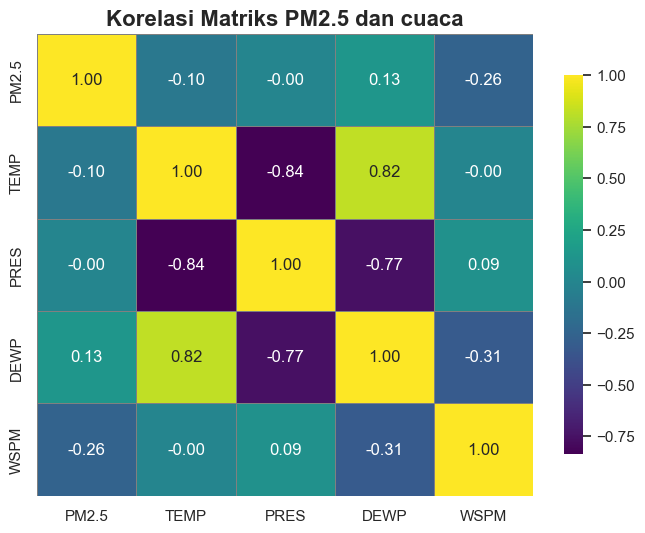

In [88]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5, linecolor='grey', cbar_kws={'shrink': .82})
plt.title('Korelasi Matriks PM2.5 dan cuaca', fontsize=16, fontweight='bold')
plt.show()

Insight:
Analisis korelasi dapat membantu kita memahami hubungan antara variabel  cuaca dan kualitas udara. Misalnya, jika ada korelasi negatif antara PM2.5 dan kecepatan angin, itu bisa menunjukkan bahwa angin yang lebih kencang dapat membantu mengurangi konsentrasi polusi.

Pertanyaan 3: Bagaimana perbandingan tingkat polusi PM2.5 di Changping dan Dingling pada musim yang berbeda?

In [89]:
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'


data_clean['season'] = data_clean['month'].apply(get_season)
seasonal_air_quality = data_clean.groupby(['season', 'station'])[['PM2.5', 'PM10']].mean().reset_index()

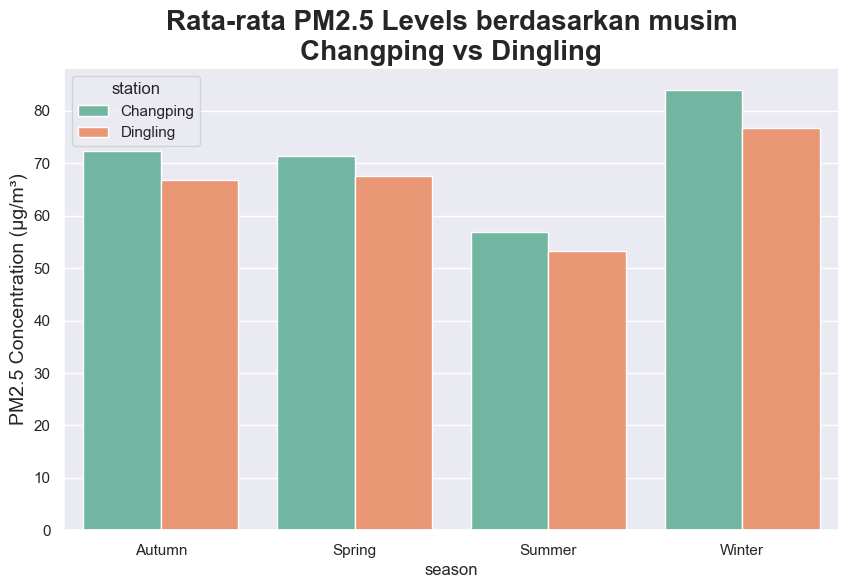

In [90]:
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='PM2.5', hue='station', data=seasonal_air_quality, palette='Set2', errorbar=None)
plt.title('Rata-rata PM2.5 Levels berdasarkan musim\nChangping vs Dingling', fontsize=20, fontweight='bold')
plt.ylabel('PM2.5 Concentration (µg/m³)', fontsize=14)
plt.show()

Insight: Dengan menganalisis perbedaan musiman, kita dapat melihat kapan tingkat polusi udara biasanya lebih tinggi.

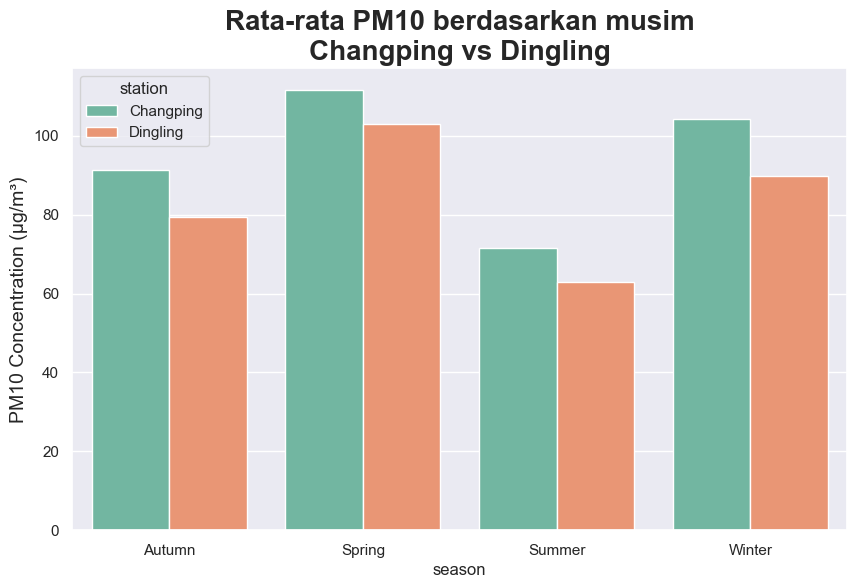

In [91]:
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='PM10', hue='station', data=seasonal_air_quality, palette='Set2', errorbar=None)
plt.title('Rata-rata PM10 berdasarkan musim\nChangping vs Dingling', fontsize=20, fontweight='bold')
plt.ylabel('PM10 Concentration (µg/m³)', fontsize=14)
plt.show()

Insight:
Hasil analisis musiman PM10 memberikan gambaran tentang pengaruh musiman terhadap tingkat debu dan polutan lainnya, yang penting untuk kebijakan kesehatan masyarakat dan perlindungan lingkungan.

## Analisis Lanjutan (Opsional)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7632\1892615640.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='station', y='PM2.5', data=data_clean, palette='Set2')


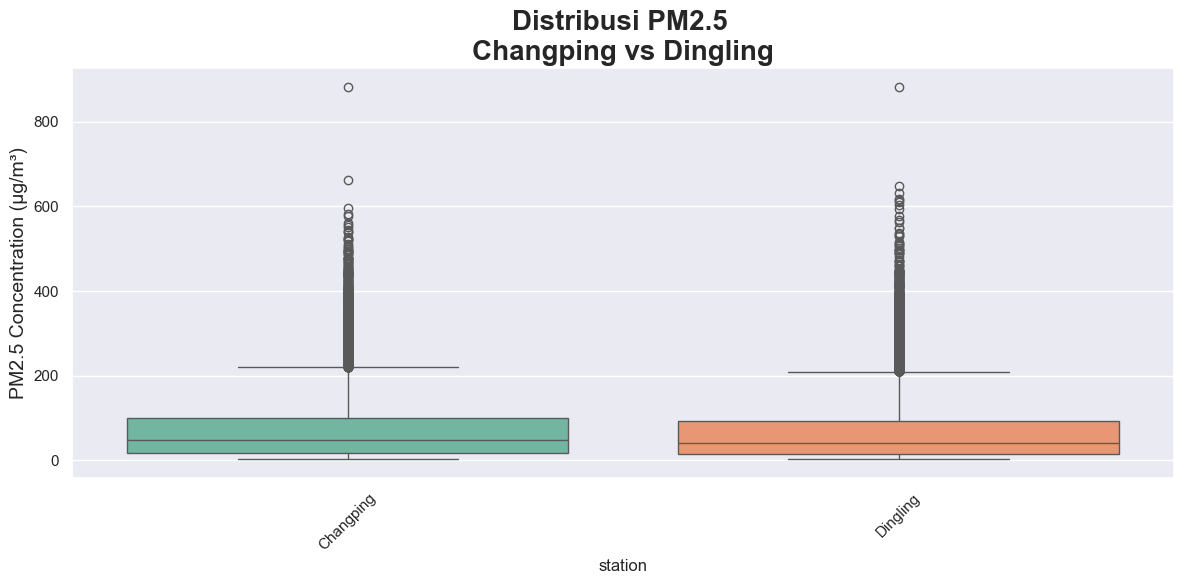

In [92]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='station', y='PM2.5', data=data_clean, palette='Set2')
plt.title('Distribusi PM2.5 \nChangping vs Dingling', fontsize=20, fontweight='bold')
plt.ylabel('PM2.5 Concentration (µg/m³)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Insight:
Dengan menggunakan boxplot, kita dapat melihat distribusi dan outlier dari tingkat PM2.5 di masing-masing stasiun. Memberi indikasi tentang seberapa sering terjadi level polusi yang tinggi dan di mana perhatian lebih diperlukan.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7632\4148406691.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='station', y='PM10', data=data_clean, palette='Set2')


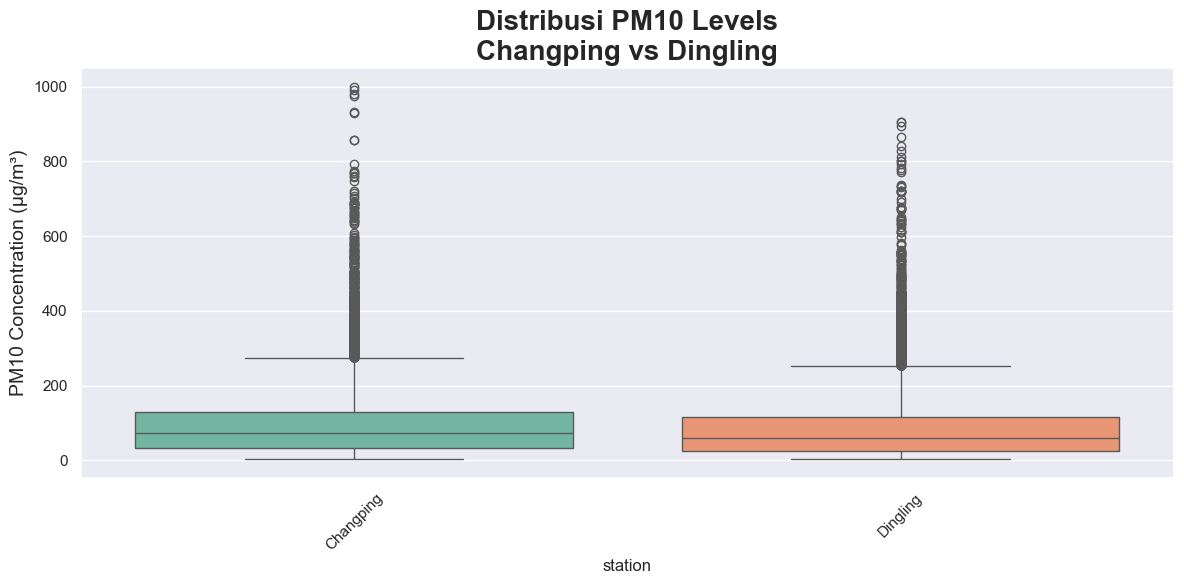

In [93]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='station', y='PM10', data=data_clean, palette='Set2')
plt.title('Distribusi PM10 Levels\nChangping vs Dingling', fontsize=20, fontweight='bold')
plt.ylabel('PM10 Concentration (µg/m³)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 Insight:
 Boxplot PM10 memberikan wawasan lebih lanjut tentang sebaran dan frekuensi level tinggi PM10. Penting untuk memahami dampak polusi debu terhadap kesehatan publik dan kualitas hidup.

## Conclusion

- kesimpulan pertanyaan 1:
Dalam grafik yang dihasilkan, terlihat bahwa tingkat PM2.5 mengalami peningkatan dan penurunan yang berbeda-beda di antara kedua lokasi, Changping dan Dingling. Secara umum, terdapat pola musiman, dengan tingkat PM2.5 cenderung lebih tinggi pada bulan-bulan tertentu, terutama selama musim dingin, yang mungkin terkait dengan kondisi cuaca dan sumber polusi yang berbeda.

- Kesimpulan pertanyaan 2:
Analisis korelasi antara variabel cuaca dan tingkat PM2.5 menunjukkan adanya hubungan negatif antara kecepatan angin dan tingkat PM2.5. Hal ini menunjukkan bahwa peningkatan kecepatan angin cenderung menurunkan konsentrasi PM2.5, mungkin karena angin membantu mendispersikan polusi. Namun, hubungan antara suhu dan tingkat PM2.5 menunjukkan korelasi yang lebih lemah, yang menunjukkan bahwa faktor lain juga berperan dalam perubahan tingkat polusi.

- Kesimpulan pertanyaan 3:
Terdapat perbedaan signifikan dalam tingkat PM2.5 antara Changping dan Dingling berdasarkan musim. Secara keseluruhan, tingkat PM2.5 di Changping cenderung lebih tinggi dibandingkan dengan Dingling, terutama selama musim dingin. Analisis musiman menunjukkan bahwa selama musim dingin, kedua lokasi mengalami peningkatan tingkat polusi, tetapi dampak lebih besar terlihat di Changping, yang mungkin disebabkan oleh faktor-faktor lokal seperti kegiatan industri dan transportasi.
